# EDA cho tập dữ liệu Spaceship Titanic

## 1. Import các thư viện cần thiết cho EDA

In [23]:
import pandas as pd # Xử lý dữ liệu dạng bảng
import matplotlib.pyplot as plt # Vẽ biểu đồ
import seaborn as sns # Vẽ biểu đồ nâng cao
import sys
sys.path.append("..") # Thêm thư mục cha vào đường dẫn tìm kiếm
from modules import * # Các hàm EDA tự viết

## 2 Tải dữ liệu

In [24]:
# !kaggle competitions download -c spaceship-titanic
# !unzip spaceship-titanic.zip -d ../data/spaceship-titanic

In [25]:
train_path = "../data/spaceship-titanic/train.csv"
train_df = pd.read_csv(train_path, index_col = "PassengerId")
train_df.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
PassengerId,,,,,,,,,,,,,
0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


## 3 Tổng quan dữ liệu 

In [26]:
# Số lượng bản ghi và số lượng feature
train_df.shape

(8693, 13)

In [27]:
# Kiểu dữ liệu và số lượng giá trị không null
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8693 entries, 0001_01 to 9280_02
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Cabin         8494 non-null   object 
 3   Destination   8511 non-null   object 
 4   Age           8514 non-null   float64
 5   VIP           8490 non-null   object 
 6   RoomService   8512 non-null   float64
 7   FoodCourt     8510 non-null   float64
 8   ShoppingMall  8485 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
 11  Name          8493 non-null   object 
 12  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(6)
memory usage: 891.4+ KB


In [28]:
# Thống kê mô tả các biến số
train_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [29]:
# Chuyển object sang category
categorical_features = train_df.select_dtypes(include=['object']).columns
for col in categorical_features:
    train_df[col] = train_df[col].astype('category')
# Thống kê mô tả các biến phân loại
train_df.describe(include = "category")

,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,8492,8476,8494,8511,8490,8493
unique,3,2,6560,3,2,8473
top,Earth,False,G/734/S,TRAPPIST-1e,False,Anton Woody
freq,4602,5439,8,5915,8291,2


In [30]:
# Kiểm tra có trùng lặp không
train_df.duplicated().sum()

np.int64(0)

In [31]:
# Kiểm tra missing values
get_missings_percentage(train_df, train_df.columns)

,%Missing
HomePlanet,0.02%
CryoSleep,0.02%
Cabin,0.02%
Destination,0.02%
Age,0.02%
VIP,0.02%
RoomService,0.02%
FoodCourt,0.02%
ShoppingMall,0.02%
Spa,0.02%


- Bộ dữ liệu có 8693 mẫu với 12 đặc trưng và 1 biến mục tiêu
  - Có 6 đặc trưng dạng số, 6 đặc trưng dạng category và biến mục tiêu dạng bool
  - Các thuộc tính đều có missing value
  - Không có mẫu trùng lặp

## 4. Phân tích dữ liệu 

### 4.1 Phân tích đơn biến 
- Vì thuộc tính `Name` và `Cabin` có giá trị phân biệt gần bằng số luợng mẫu của tập dữ liệu (Xem thống kê mô tả ở `3. Tổng quan dữ liệu`). Nên không có nhiều ý nghĩa thống kê để phân tích ở đây.

#### 4.1.1 Phân phối dữ liệu

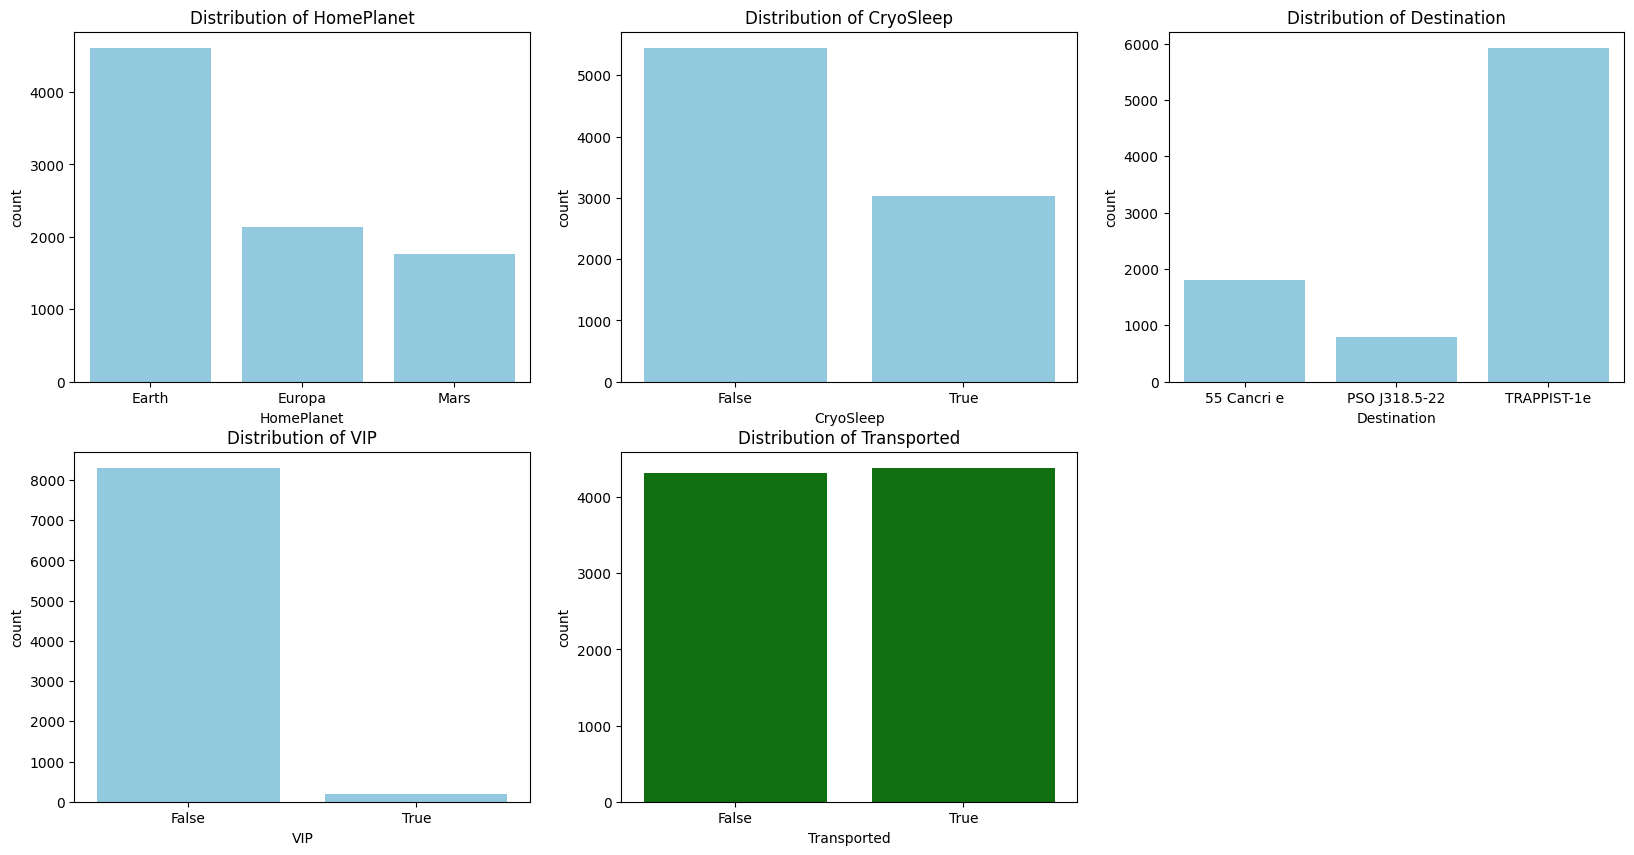

In [32]:
# Biểu đồ phân phối các biến phân loại
categorical_interests = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Transported']
fig, axis = plt.subplots(2, 3, figsize=(20, 10))
for i, col in enumerate(categorical_interests):
    if i == 4:
        color = "green"
    else:
        color = "skyblue"
    ax = axis[i // 3, i % 3]
    sns.countplot(data=train_df, x=col, ax=ax, color=color)
    ax.set_title(f"Distribution of {col}")
fig.delaxes(axis[1, 2])

- `HomePlanet`:
  - Earth: chiếm đa số (khoảng 4500 người)
  - Europa: đứng thử hai (khoảng 2100 người) 
  - Mars: khoảng 1800 người.
  > Hành khách đến chủ yếu từ Earth.
-  `CryoSleep`: Hành khách chọn ngủ đông ít hơn hành khách không chọn ngủ đông (gần một nửa)
-  `Destination`: TRAPPIST-1e là điểm đến phổ biến nhất (khoảng 6000).
-  `VIP`: Phần lớn hành khách không phải VIP, hành khách đăng kí VIP cực kỳ ít.
-  `Transported`: Tỉ lệ nhãn ở biến mục tiêu gần như cân bằng, đảm bảo không bị bias nhãn nào. 

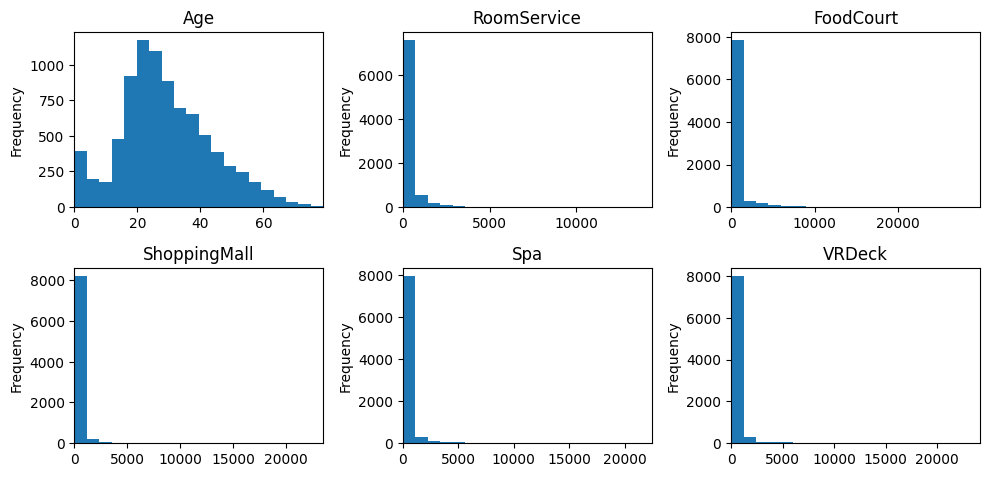

In [33]:
# Biểu đồ phân phối cho các biến số
numerical_features = train_df.select_dtypes(include=['float64']).columns
plt.figure(figsize=(10,7))
for i,col in enumerate(numerical_features):
    plt.subplot(3,3,i + 1)
    train_df[col].plot(kind='hist', bins=20)
    plt.xlim(0, train_df[col].max())
    plt.title(col)
plt.tight_layout()

- `Age`: 
  - Phân phối lệch trái
  - Đỉnh nằm ở nhóm từ 20 - 30 tuổi, đa phần là nguời trẻ
- `RoomService`, `FoodCourt`, `ShoppingMall`, `Spa` và `VRDeck`: 
  - Đa số giá trị bằng 0, phân phối lệch trái nặng
  - Có nhiều giá trị ngoại lai, nhiều nhất là ở `RoomService` và `FoodCourt`
  > Hầu hết các hành khách không sử dụng dịch vụ của Spaceship Titanic

#### 4.1.2 Ngoại lai

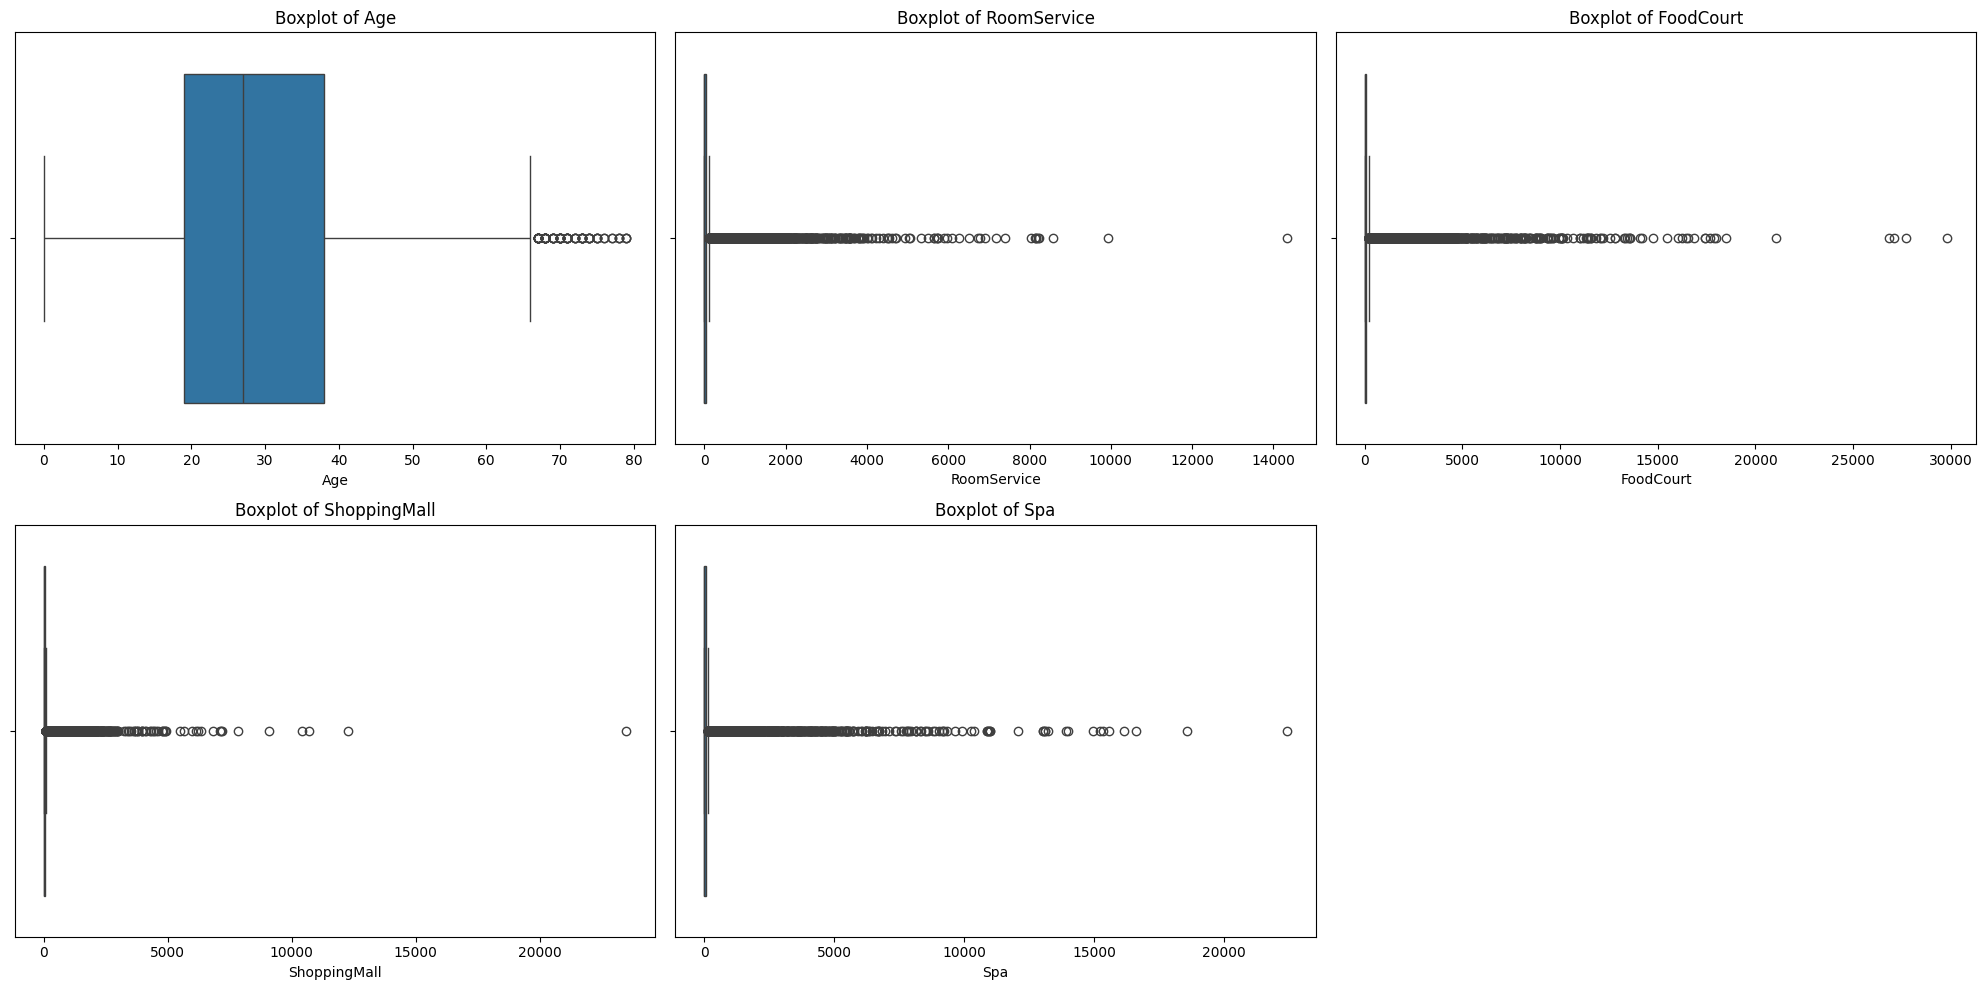

In [34]:
fig, axis = plt.subplots(2, 3, figsize=(20, 10))
for i, col in enumerate(numerical_features):
    ax = axis[i // 3, i % 3]
    sns.boxplot(x=train_df[col], ax=ax)
    ax.set_title(f"Boxplot of {col}")
fig.delaxes(axis[1, 2])
plt.tight_layout()

- Như đã phân tích ở phần `4.1.1 Phân phối dữ liệu`. Các thuộc tính `RoomService`, `FoodCourt`, `ShoppingMall`, `Spa` và `VRDeck` có nhiều giá trị ngoại lai, và điều đó thể hiện rõ ở các biểu đồ trên.
- `Age`: cũng có vài giá trị ngoại lai 

### 4.2 Phân tích đa biến

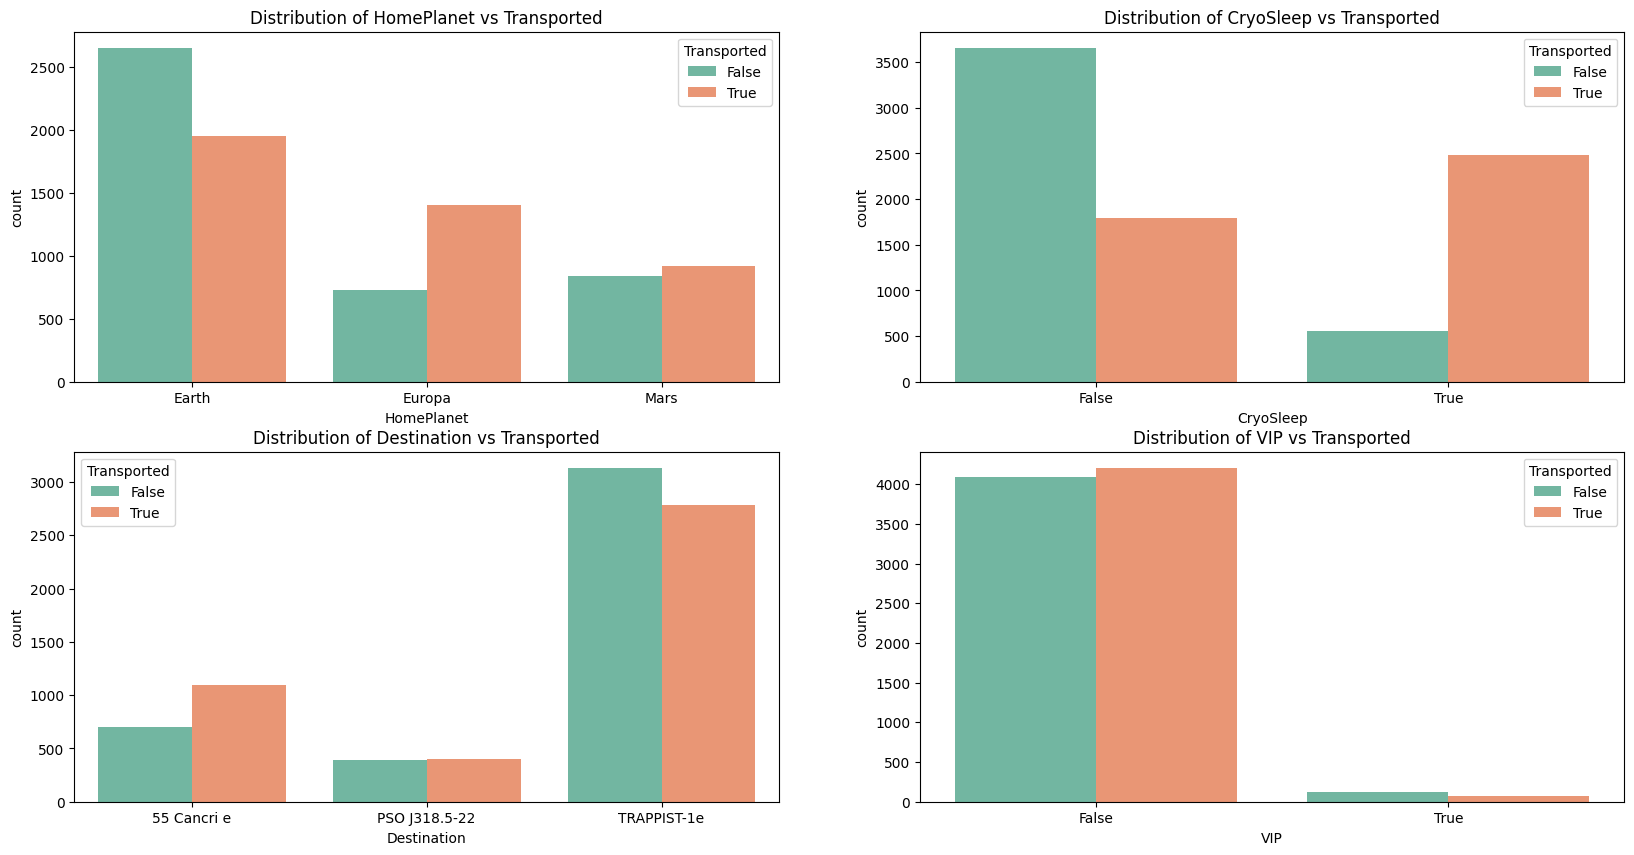

In [35]:
fig, axis = plt.subplots(2, 2, figsize=(20, 10))
categorical_multi = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']
for i, col in enumerate(categorical_multi):
    ax = axis[i // 2, i % 2]
    sns.countplot(data=train_df, x=col, ax=ax, hue="Transported", palette="Set2")
    ax.set_title(f"Distribution of {col} vs Transported")

- `HomePlanet`:
  - Europa: có tỷ lệ nguời bị Transported cao 
  - Earth: số nguời không bị Transported cao
  - Mars: gần như cân bằng
- `CryoSleep`:
  - Nhóm CryoSleep = True, phần lớn bị Transported
  - Nhóm CryoSleep = False, phần lớn không bị Transported
- `Destination` và `VIP`: dữ liệu gần như cân bằng cả hai nhóm, trừ truờng hợp Destination = "55 Cancri e", nhóm này có số luợng Transported cao hơn rõ rệt.


<Axes: xlabel='Transported', ylabel='Age'>

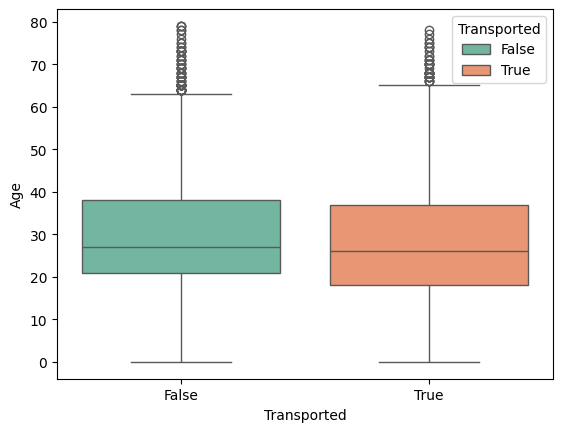

In [36]:

sns.boxplot(data = train_df, x=train_df["Transported"], y=train_df["Age"], hue=train_df["Transported"], palette="Set2")


> 2 nhóm Transported và không Transported có phân phối gần giống nhau -> Tuổi không phải là biến phân tách mạnh cho Transported

<Axes: >

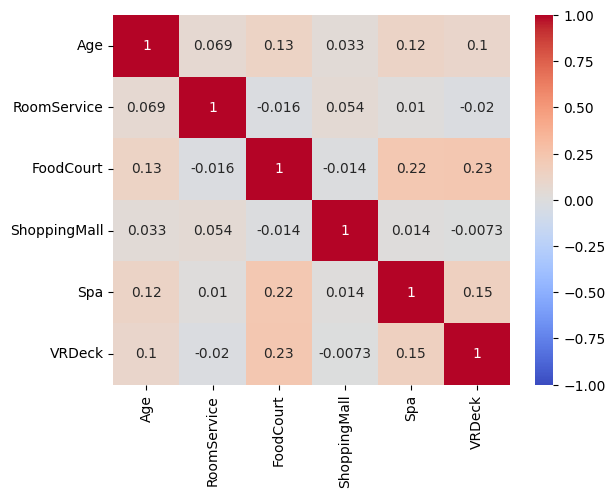

In [37]:
sns.heatmap(train_df.corr(numeric_only=True).iloc[:-1, :-1], annot=True, cmap='coolwarm', vmin=-1, vmax=1)

Các biến số (`Age`, `RoomService`, `FoodCourt`, `ShoppingMall`, `Spa` và `VRDeck`) không có quan hệ tuyến tính mạnh với nhau.

Điều này cho thấy rằng không có vấn đề đa cộng tuyến (multicollinearity) trên các thuộc tính dạng số.

## 5. Tiền xử lí dữ liệu
- Xử lí missing value:
  - Dữ liệu dạng số: Dùng mean
  - Dữ liệu dạng categorical: Dùng mode 
  - Riêng feature `Name` thì điền là Unknown, Vì thuộc tính này đặc trưng cho từng hàng khách 

### 5.1 Dữ liệu dạng số

In [38]:
numerical_features = train_df._get_numeric_data().columns
for col in numerical_features:
    train_df[col] = train_df[col].fillna(train_df[col].mean())
get_missings(train_df, numerical_features)

,MissingNumber
Age,0
RoomService,0
FoodCourt,0
ShoppingMall,0
Spa,0
VRDeck,0
Transported,0


In [39]:
categorical_features = train_df.select_dtypes(include=['category']).columns
for col in categorical_features:
    if col != "Name":
        train_df[col] = train_df[col].fillna(train_df[col].mode()[0])
    else:
        if "Unknown" not in train_df[col].cat.categories:
            train_df[col] = train_df[col].cat.add_categories("Unknown")
        train_df[col] = train_df[col].fillna("Unknown")
get_missings(train_df, categorical_features)

,MissingNumber
HomePlanet,0
CryoSleep,0
Cabin,0
Destination,0
VIP,0
Name,0


## 6. Feature Engineering

In [40]:
train_df['Deck'] = train_df['Cabin'].apply(lambda s: s[0] if pd.notnull(s) else 'M')
train_df['Port'] = train_df['Cabin'].apply(lambda s: s[-1] if pd.notnull(s) else 'M')
train_df["Deck"] = train_df["Deck"].map({'B':0, 'F':1, 'A':2, 'G':3, 'E':4, 'D':5, 'C':6, 'T':7}).astype(int)
train_df["Port"] = train_df["Port"].map({'P':0, 'S':1}).astype(int)
train_df.drop(['Cabin'], axis=1, inplace=True)

train_df["HomePlanet"] = train_df["HomePlanet"].map({'Earth':0, 'Europa':1, 'Mars':2}).astype(int)


unique_destinations = train_df["Destination"].unique()
train_df["Destination"] = train_df["Destination"].map(dict(zip(unique_destinations,list(range(len(unique_destinations)))))).astype(int)

unique_vip = train_df["VIP"].unique()
train_df["VIP"] = train_df["VIP"].map(dict(zip(unique_vip,list(range(len(unique_vip)))))).astype(int)

unique_cryosleep = train_df["CryoSleep"].unique()
train_df["CryoSleep"] = train_df["CryoSleep"].map(dict(zip(unique_cryosleep,list(range(len(unique_cryosleep)))))).astype(int)
train_df.drop(['Name'], axis=1, inplace=True)

In [41]:
train_df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Port
PassengerId,,,,,,,,,,,,,
0001_01,1,0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,False,0,0
0002_01,0,0,0,24.0,0,109.0,9.0,25.0,549.0,44.0,True,1,1
0003_01,1,0,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False,2,1
0003_02,1,0,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,False,2,1
0004_01,0,0,0,16.0,0,303.0,70.0,151.0,565.0,2.0,True,1,1


In [42]:
# import pathlib
# filepath = "../data/spaceship-titanic/train.csv"
# filename =  pathlib.Path(filepath).stem + "_cleaned.csv"
# file_dest_path = pathlib.Path("./data") / filename
# train_df.to_csv(file_dest_path, index=False)

## 7. Insights và kết luận

- `CryoSleep`, `Destination`, `HomePlanet` có mối quan hệ với khả năng Transported → nên ưu tiên trong mô hình.

- `Age` ít ảnh hưởng đến khả năng Transported.

- Các biến chi tiêu phân phối không đều, chứa nhiều ngoại lệ → cần xử lý và có thể tạo đặc trưng mới.

- Dữ liệu `VIP` mất cân bằng → có thể ít ảnh hưởng trong mô hình.

- Biến mục tiêu cân bằng → thuận lợi cho huấn luyện mô hình phân loại.

In [ ]:
# One-hot encoding
# pd.get_dummies(train_df,columns=['HomePlanet', 'Destination'], drop_first=True, dtype=int).head()



,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Port,HomePlanet_1,HomePlanet_2,Destination_1,Destination_2
PassengerId,,,,,,,,,,,,,,,
0001_01,0,39.0,0,0.0,0.0,0.0,0.0,0.0,False,0,0,1,0,0,0
0002_01,0,24.0,0,109.0,9.0,25.0,549.0,44.0,True,1,1,0,0,0,0
0003_01,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False,2,1,1,0,0,0
0003_02,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,False,2,1,1,0,0,0
0004_01,0,16.0,0,303.0,70.0,151.0,565.0,2.0,True,1,1,0,0,0,0
